In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn import model_selection
from sklearn import linear_model   #For linear regression
from sklearn import metrics
from sklearn import preprocessing   #For decision tree
from sklearn import feature_selection   #For RFE
from sklearn import ensemble   #For random forest

In [7]:
df=pd.read_csv('credit_default.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<h3>Exploratory Data Analysis

In [3]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [5]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
df.info

<bound method DataFrame.info of           ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1    20000.0    2          2         1   24      2      2     -1   
1          2   120000.0    2          2         2   26     -1      2      0   
2          3    90000.0    2          2         2   34      0      0      0   
3          4    50000.0    2          2         1   37      0      0      0   
4          5    50000.0    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996   220000.0    1          3         1   39      0      0      0   
29996  29997   150000.0    1          3         2   43     -1     -1     -1   
29997  29998    30000.0    1          2         2   37      4      3      2   
29998  29999    80000.0    1          3         1   41      1     -1      0   
29999  30000    50000.0    1          2         1   46      0      0      0   

       PAY_4  ...  

In [4]:
contcols=['ID','LIMIT_BAL','AGE','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
discols=['SEX', 'EDUCATION', 'MARRIAGE','PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','default.payment.next.month']

In [5]:
df.drop('ID',axis=1,inplace=True)
df[:5]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
df.rename(columns={'default.payment.next.month':'default','PAY_0':'PAY_1'},inplace=True)
df[:5]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [7]:
df['PAY_1'].value_counts()/df.shape[0]

 0    0.491233
-1    0.189533
 1    0.122933
-2    0.091967
 2    0.088900
 3    0.010733
 4    0.002533
 5    0.000867
 8    0.000633
 6    0.000367
 7    0.000300
Name: PAY_1, dtype: float64

In [8]:
cols=['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
df[cols]=df[cols].replace(0,-1)
df['PAY_1'].value_counts()

-1    20423
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64

In [9]:
cols=['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
df = df.drop(df[(df[cols] == -2).any(axis=1)].index)
df['PAY_1'].value_counts()

-1    18299
 2     2518
 1     2181
 3      305
 4       74
 5       23
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64

In [10]:
df['MARRIAGE'].value_counts() 

2    12632
1    10495
3      274
0       38
Name: MARRIAGE, dtype: int64

In [11]:
df=df.drop(df[df['MARRIAGE'] == 0].index)
df['MARRIAGE'].value_counts() 

2    12632
1    10495
3      274
Name: MARRIAGE, dtype: int64

In [12]:
df['EDUCATION'].value_counts()

2    11519
1     7564
3     3995
5      205
4       72
6       38
0        8
Name: EDUCATION, dtype: int64

In [13]:
df['EDUCATION']=df['EDUCATION'].replace(6,5)
df=df.drop(df[df['EDUCATION'] == 0].index)
df['EDUCATION'].value_counts()

2    11519
1     7564
3     3995
5      243
4       72
Name: EDUCATION, dtype: int64

<h3>Visualisation

<AxesSubplot:xlabel='BILL_AMT2', ylabel='LIMIT_BAL'>

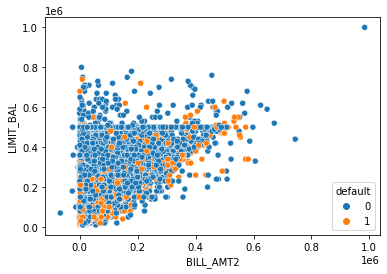

In [14]:
sns.scatterplot(x="BILL_AMT2",y="LIMIT_BAL",hue="default",data=df)
#For same limit balance, if bill amt increases, default increases

In [15]:
df['default'].value_counts()/df.shape[0]

0    0.769931
1    0.230069
Name: default, dtype: float64

In [16]:
pd.crosstab(index=df["MARRIAGE"],columns=df["default"],normalize="index")   #Married 

default,0,1
MARRIAGE,,
1,0.754503,0.245497
2,0.783621,0.216379
3,0.729927,0.270073


In [17]:
pd.crosstab(index=df["EDUCATION"],columns=df["default"],normalize="index")

default,0,1
EDUCATION,,
1,0.804469,0.195531
2,0.752843,0.247157
3,0.741427,0.258573
4,0.958333,0.041667
5,0.917695,0.082305


In [18]:
pd.crosstab(index=df["SEX"],columns=df["default"],normalize="index")

default,0,1
SEX,,
1,0.750026,0.249974
2,0.783641,0.216359


In [19]:
pd.crosstab(index=df["PAY_1"],columns=df["default"],normalize="index")

default,0,1
PAY_1,,
-1,0.863283,0.136717
1,0.624655,0.375345
2,0.304970,0.695030
3,0.229508,0.770492
4,0.324324,0.675676
5,0.454545,0.545455
6,0.454545,0.545455
7,0.222222,0.777778
8,0.421053,0.578947


In [20]:
pd.crosstab(index=df['PAY_2'],columns=df['default'])


default,0,1
PAY_2,,
-1,16204,3050
1,15,1
2,1603,2051
3,122,195
4,45,49
5,10,15
6,3,9
7,8,12
8,1,0


In [21]:
df[df['PAY_2']==8]  #DROP!!!!

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
8843,40000.0,2,3,1,24,1,8,7,6,5,...,24579.0,23635.0,22680.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [22]:
df=df[df['PAY_2']!=8]


<AxesSubplot:xlabel='AGE', ylabel='LIMIT_BAL'>

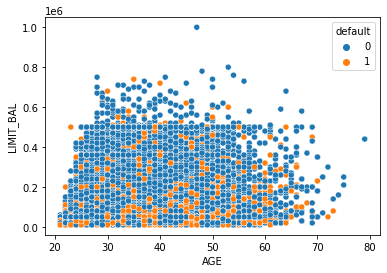

In [23]:
sns.scatterplot(x="AGE",y="LIMIT_BAL",hue="default",data=df)

In [24]:
df['EDUCATION'].value_counts()/df.shape[0]

2    0.492433
1    0.323358
3    0.170742
5    0.010388
4    0.003078
Name: EDUCATION, dtype: float64

<AxesSubplot:xlabel='default', ylabel='AGE'>

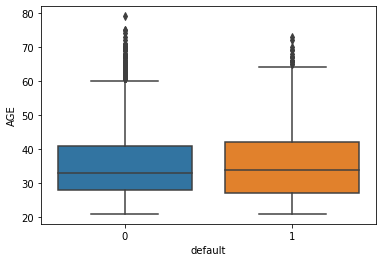

In [25]:
sns.boxplot(y='AGE',x='default',data=df)     #AGE has no significance

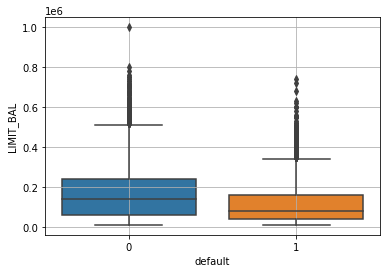

In [26]:
sns.boxplot(y='LIMIT_BAL',x='default',data=df)
plt.grid(True)      #High balance limit defaults less

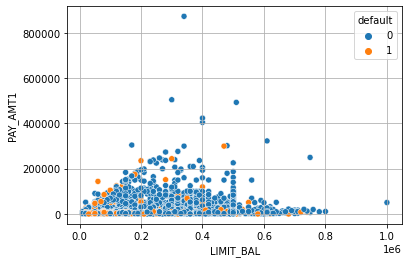

In [27]:
sns.scatterplot(x='LIMIT_BAL',y='PAY_AMT1',hue='default',data=df)
plt.grid(True)

Text(0.5, 1.0, 'Default Payment by Gender')

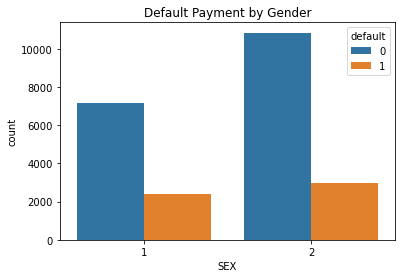

In [28]:
sns.countplot(x='SEX', hue='default', data=df)
plt.title('Default Payment by Gender')

Text(0.5, 1.0, 'Default Payment by Education')

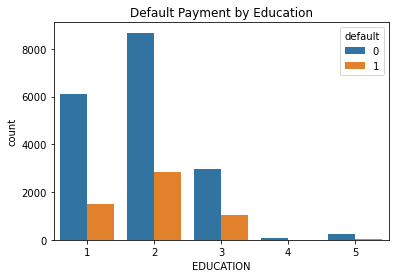

In [29]:
sns.countplot(x='EDUCATION', hue='default',data=df)
plt.title('Default Payment by Education')

Text(0.5, 1.0, 'Default Payment by Marital Status')

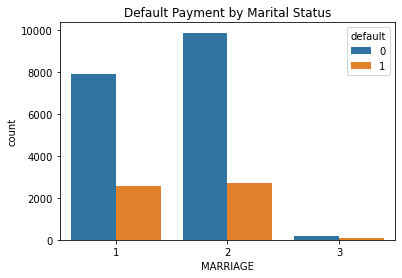

In [30]:
sns.countplot(x='MARRIAGE', hue='default', data=df)
plt.title('Default Payment by Marital Status')

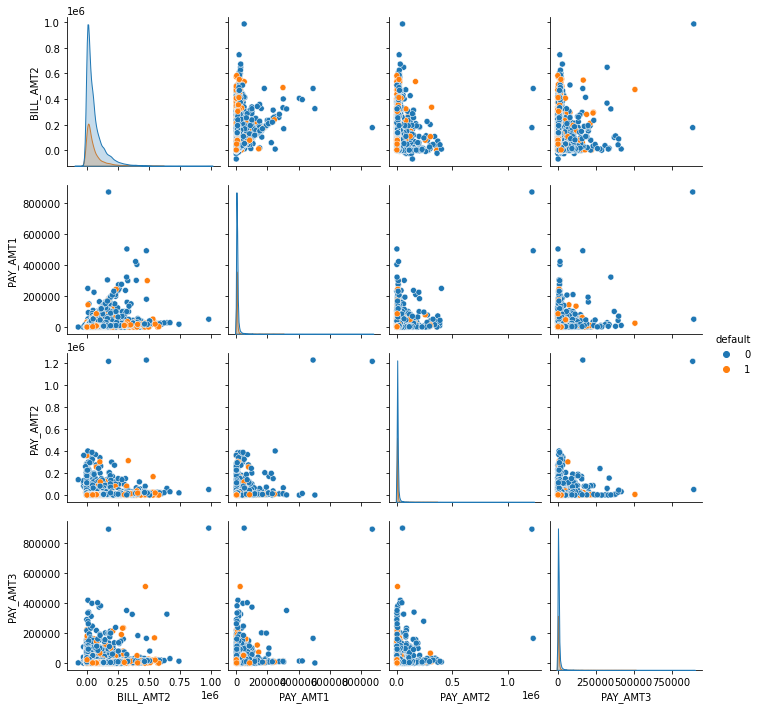

In [31]:
sns.pairplot(data=df,hue='default',vars=['BILL_AMT2','PAY_AMT1','PAY_AMT2','PAY_AMT3'])

In [32]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

<h4>For same limit balance, if bill amt increases, default increases
<h4>High balance limit defaults less
<h4>AGE, Gender, Education, Marriage has no significance,
<h4>For same limit balance, if bill amt increases, default increases

<h3>Prediction

In [33]:
X=df.drop(['default'],axis=1)
y=df['default']
Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=.30,random_state=42)

In [66]:
grid={'n_estimators':[150,200,250,300,350],
      'max_depth':[4,5,6,7,8],
      'min_samples_split':[40,50,60,70]}   
model=ensemble.RandomForestClassifier(random_state=42)    
gridobj=model_selection.GridSearchCV(estimator=model,  
                                     param_grid=grid,
                                     scoring='recall',   
                                     n_jobs=-1,     
                                     cv=5,
                                     return_train_score=True)
gridobj.fit(Xtrain,ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'min_samples_split': [40, 50, 60, 70],
                         'n_estimators': [150, 200, 250, 300, 350]},
             return_train_score=True, scoring='recall')

In [68]:
print(gridobj.best_params_) 

{'max_depth': 8, 'min_samples_split': 60, 'n_estimators': 300}


In [36]:
gridobj.best_score_

0.4234954076555777

In [37]:
model=ensemble.RandomForestClassifier(n_estimators=100,max_depth=6,
                                      random_state=42,n_jobs=-1)        

model.fit(Xtrain,ytrain)
predtrain=model.predict(Xtrain) 
predtest=model.predict(Xtest)

def printscores(act,pred):
    print("Accuracy :",metrics.accuracy_score(act,pred))
    print("Recall :",metrics.recall_score(act,pred))   
    print("Precision :",metrics.precision_score(act,pred))
    print("F1 :",metrics.f1_score(act,pred))
    print("AUC :",metrics.roc_auc_score(act,pred))
    
print("TRAINING METRICS :-")
printscores(ytrain,predtrain)
print("============")
print("TEST METRICS :-")
printscores(ytest,predtest)

TRAINING METRICS :-
Accuracy : 0.8321729571271528
Recall : 0.43151417870518993
Precision : 0.7213774597495528
F1 : 0.5400066956812856
AUC : 0.6911053008119176
TEST METRICS :-
Accuracy : 0.8188942718723283
Recall : 0.40145985401459855
Precision : 0.6969376979936642
F1 : 0.5094558085681204
AUC : 0.6740272846552338


In [38]:
pd.Series(model.feature_importances_,index=Xtrain.columns).sort_values(ascending=False)

PAY_1        0.360898
PAY_2        0.161065
PAY_5        0.063977
PAY_4        0.061977
PAY_3        0.060432
PAY_6        0.059230
PAY_AMT1     0.036479
LIMIT_BAL    0.030676
PAY_AMT3     0.022763
PAY_AMT2     0.022496
BILL_AMT1    0.014369
BILL_AMT2    0.013304
PAY_AMT4     0.013249
PAY_AMT6     0.013008
PAY_AMT5     0.012303
BILL_AMT4    0.011638
BILL_AMT6    0.010015
BILL_AMT3    0.009850
BILL_AMT5    0.009508
AGE          0.007068
EDUCATION    0.003196
MARRIAGE     0.001596
SEX          0.000902
dtype: float64

In [39]:
model=ensemble.RandomForestClassifier(max_depth=8, min_samples_split=40, n_estimators=200,
                                      random_state=42,n_jobs=-1)
rfeobj=feature_selection.RFE(estimator=model,n_features_to_select=20)
rfeobj.fit(Xtrain,ytrain)
print("SIGNIFICANT COLUMNS :",Xtrain.columns[rfeobj.support_])   
arr=rfeobj.transform(Xtrain)
Xtrain1=pd.DataFrame(arr,columns=Xtrain.columns[rfeobj.support_],index=Xtrain.index)
Xtest1=pd.DataFrame(rfeobj.transform(Xtest),columns=Xtest.columns[rfeobj.support_],index=Xtest.index)

SIGNIFICANT COLUMNS : Index(['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')


In [40]:
model=ensemble.RandomForestClassifier(max_depth=7, min_samples_split=50, n_estimators=400,
                                      random_state=42,n_jobs=-1)
model.fit(Xtrain1,ytrain)
predtrain=model.predict(Xtrain1) 
predtest=model.predict(Xtest1)


def printscores(act,pred):
    print("Accuracy :",metrics.accuracy_score(act,pred))
    print("Recall :",metrics.recall_score(act,pred))   
    print("Precision :",metrics.precision_score(act,pred))
    print("F1 :",metrics.f1_score(act,pred))
    print("AUC :",metrics.roc_auc_score(act,pred))
    
print("TRAINING METRICS :-")
printscores(ytrain,predtrain)
print("============")
print("TEST METRICS :-")
printscores(ytest,predtest)

TRAINING METRICS :-
Accuracy : 0.8321729571271528
Recall : 0.4411449973247726
Precision : 0.7144714038128249
F1 : 0.5454846179292093
AUC : 0.6944962086972074
TEST METRICS :-
Accuracy : 0.8180393274437162
Recall : 0.41362530413625304
Precision : 0.6847935548841894
F1 : 0.515737580583997
AUC : 0.6776909550082084


In [59]:
from imblearn.under_sampling import NearMiss

ns = NearMiss(sampling_strategy='not minority')

Xtrain, ytrain = ns.fit_resample(Xtrain, ytrain)
print(pd.DataFrame(ytrain).value_counts())

Xtest, ytest = ns.fit_resample(Xtest, ytest)
print(pd.DataFrame(ytest).value_counts())

default
0          3738
1          3738
dtype: int64
default
0          1644
1          1644
dtype: int64


In [98]:
model=ensemble.RandomForestClassifier(max_depth=40, min_samples_split=70, n_estimators=150,
                                      random_state=42,n_jobs=-1)
model.fit(Xtrain,ytrain)
predtrain=model.predict(Xtrain) 
predtest=model.predict(Xtest)


def printscores(act,pred):
    print("Accuracy :",metrics.accuracy_score(act,pred))
    print("Recall :",metrics.recall_score(act,pred))   
    print("Precision :",metrics.precision_score(act,pred))
    print("F1 :",metrics.f1_score(act,pred))
    print("AUC :",metrics.roc_auc_score(act,pred))
    
print("TRAINING METRICS :-")
printscores(ytrain,predtrain)
print("============")
print("TEST METRICS :-")
printscores(ytest,predtest)

TRAINING METRICS :-
Accuracy : 0.807784911717496
Recall : 0.7651150347779562
Precision : 0.8365019011406845
F1 : 0.7992175492524801
AUC : 0.8077849117174961
TEST METRICS :-
Accuracy : 0.7597323600973236
Recall : 0.7311435523114356
Precision : 0.775483870967742
F1 : 0.7526612398246714
AUC : 0.7597323600973237
